# Text Generation using RNN

### example
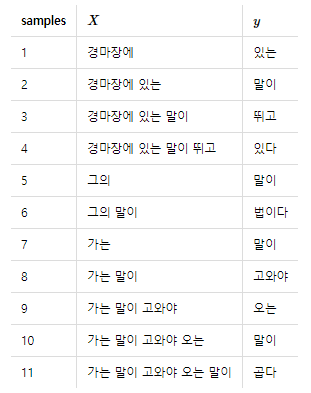

### 1) data preprocessing

In [1]:
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical

In [2]:
text="""경마장에 있는 말이 뛰고 있다\n
그의 말이 법이다\n
가는 말이 고와야 오는 말이 곱다\n"""

a) Tokenize

In [3]:
t = Tokenizer()
t.fit_on_texts([text])

In [5]:
t.word_index

{'말이': 1,
 '경마장에': 2,
 '있는': 3,
 '뛰고': 4,
 '있다': 5,
 '그의': 6,
 '법이다': 7,
 '가는': 8,
 '고와야': 9,
 '오는': 10,
 '곱다': 11}

( 1을 더하는 이유? Keras의 Tokenizer의 정수 인코딩은 index가 1부터 시작! )

In [6]:
vocab_size = len(t.word_index) + 1

b) Training Data

In [14]:
t.texts_to_sequences(['경마장에 있는 말이 뛰고 있다'])[0]

[2, 3, 1, 4, 5]

In [15]:
sequences = list()
for line in text.split('\n'):
    encoded = t.texts_to_sequences([line])[0]
    for i in range(1,len(encoded)):
        sequence = encoded[:i+1]
        sequences.append(sequence)

In [17]:
# 학습에 사용할 샘플의 개수
len(sequences)

11

In [16]:
sequences

[[2, 3],
 [2, 3, 1],
 [2, 3, 1, 4],
 [2, 3, 1, 4, 5],
 [6, 1],
 [6, 1, 7],
 [8, 1],
 [8, 1, 9],
 [8, 1, 9, 10],
 [8, 1, 9, 10, 1],
 [8, 1, 9, 10, 1, 11]]

In [18]:
# 샘플의 길이를 padding을 통해 일치시켜줘야! max_length로
max_len = max(len(l) for l in sequences)
max_len

6

In [19]:
sequences = pad_sequences(sequences, maxlen=max_len, padding='pre')

In [20]:
sequences

array([[ 0,  0,  0,  0,  2,  3],
       [ 0,  0,  0,  2,  3,  1],
       [ 0,  0,  2,  3,  1,  4],
       [ 0,  2,  3,  1,  4,  5],
       [ 0,  0,  0,  0,  6,  1],
       [ 0,  0,  0,  6,  1,  7],
       [ 0,  0,  0,  0,  8,  1],
       [ 0,  0,  0,  8,  1,  9],
       [ 0,  0,  8,  1,  9, 10],
       [ 0,  8,  1,  9, 10,  1],
       [ 8,  1,  9, 10,  1, 11]])

In [21]:
X = sequences[:, :-1]
y = sequences[:,-1]

In [22]:
y

array([ 3,  1,  4,  5,  1,  7,  1,  9, 10,  1, 11])

In [23]:
# One-Hot Encoding
y = to_categorical(y, num_classes=vocab_size)

In [24]:
y

array([[0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]], dtype=float32)

### 2) modeling

In [25]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Dense, SimpleRNN

In [27]:
model = Sequential()
model.add(Embedding(vocab_size,10, input_length=max_len-1)) # label을 분리하였으므로 '-1'
model.add(SimpleRNN(32))
model.add(Dense(vocab_size, activation='softmax'))

In [30]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 5, 10)             120       
_________________________________________________________________
simple_rnn (SimpleRNN)       (None, 32)                1376      
_________________________________________________________________
dense (Dense)                (None, 12)                396       
Total params: 1,892
Trainable params: 1,892
Non-trainable params: 0
_________________________________________________________________


In [28]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X,y,epochs=200, verbose=2)

Train on 11 samples
Epoch 1/200
11/11 - 2s - loss: 2.5168 - accuracy: 0.0000e+00
Epoch 2/200
11/11 - 0s - loss: 2.5045 - accuracy: 0.0000e+00
Epoch 3/200
11/11 - 0s - loss: 2.4925 - accuracy: 0.0000e+00
Epoch 4/200
11/11 - 0s - loss: 2.4807 - accuracy: 0.0000e+00
Epoch 5/200
11/11 - 0s - loss: 2.4690 - accuracy: 0.0909
Epoch 6/200
11/11 - 0s - loss: 2.4573 - accuracy: 0.0909
Epoch 7/200
11/11 - 0s - loss: 2.4455 - accuracy: 0.1818
Epoch 8/200
11/11 - 0s - loss: 2.4334 - accuracy: 0.1818
Epoch 9/200
11/11 - 0s - loss: 2.4210 - accuracy: 0.2727
Epoch 10/200
11/11 - 0s - loss: 2.4081 - accuracy: 0.3636
Epoch 11/200
11/11 - 0s - loss: 2.3947 - accuracy: 0.4545
Epoch 12/200
11/11 - 0s - loss: 2.3806 - accuracy: 0.4545
Epoch 13/200
11/11 - 0s - loss: 2.3658 - accuracy: 0.4545
Epoch 14/200
11/11 - 0s - loss: 2.3501 - accuracy: 0.4545
Epoch 15/200
11/11 - 0s - loss: 2.3336 - accuracy: 0.4545
Epoch 16/200
11/11 - 0s - loss: 2.3162 - accuracy: 0.4545
Epoch 17/200
11/11 - 0s - loss: 2.2978 - accu

Epoch 142/200
11/11 - 0s - loss: 0.4009 - accuracy: 0.9091
Epoch 143/200
11/11 - 0s - loss: 0.3931 - accuracy: 0.9091
Epoch 144/200
11/11 - 0s - loss: 0.3854 - accuracy: 0.9091
Epoch 145/200
11/11 - 0s - loss: 0.3778 - accuracy: 0.9091
Epoch 146/200
11/11 - 0s - loss: 0.3703 - accuracy: 0.9091
Epoch 147/200
11/11 - 0s - loss: 0.3629 - accuracy: 0.9091
Epoch 148/200
11/11 - 0s - loss: 0.3557 - accuracy: 0.9091
Epoch 149/200
11/11 - 0s - loss: 0.3485 - accuracy: 0.9091
Epoch 150/200
11/11 - 0s - loss: 0.3415 - accuracy: 0.9091
Epoch 151/200
11/11 - 0s - loss: 0.3346 - accuracy: 0.9091
Epoch 152/200
11/11 - 0s - loss: 0.3278 - accuracy: 0.9091
Epoch 153/200
11/11 - 0s - loss: 0.3211 - accuracy: 1.0000
Epoch 154/200
11/11 - 0s - loss: 0.3145 - accuracy: 1.0000
Epoch 155/200
11/11 - 0s - loss: 0.3080 - accuracy: 1.0000
Epoch 156/200
11/11 - 0s - loss: 0.3016 - accuracy: 1.0000
Epoch 157/200
11/11 - 0s - loss: 0.2953 - accuracy: 1.0000
Epoch 158/200
11/11 - 0s - loss: 0.2892 - accuracy: 1.00

### 3) sentence generation function (문장 생성 함수)

In [31]:
def sentence_generation(model, t, current_word, n): # 모델, tokenizer, 현재 단어, 반복 횟수
    init_word = current_word
    sentence =''
    for _ in range(n):
        encoded = t.texts_to_sequences([current_word])[0]
        encoded = pad_sequences([encoded], maxlen=5, padding='pre')
        result = model.predict_classes(encoded,verbose=0)
        
        for word, index in t.word_index.items():
            if index == result:
                break
        current_word = current_word + ' ' + word
        sentence = sentence + ' ' + word
    
    sentence = init_word + sentence
    return sentence

In [32]:
sentence_generation(model,t,'경마장에',4)

'경마장에 있는 말이 뛰고 있다'

In [34]:
sentence_generation(model,t,'그의',2)

'그의 말이 법이다'